# Powtórka
* Jaką hipotezę wybraliśmy dla regresji logistycznej?

* Co to jest funkcja wiarygodności?

*  Na czym polega "Zasada największej wiarygodności"?

* Jak pokazać, że dany rozkład należy do rodziny rozkładów wykładniczych?


$\qquad p(y;\eta) = b(y) \exp(\eta^T T(y) - a(\eta))$ 

* Jak znaleźć hipotezę dla danych modelowanych przez pewien znany rozkład w oparciu o GLM?

* Jak wygląda funkcją softmax i gdzie jej używamy?

$\qquad \phi_i = \frac{\exp(\eta_i)}{\sum_{j=1}^k \exp(\eta_j)}$

# Ocena klasyfikatorów binarnych

* Klasyfikatory binarne to te, których zadaniem jest przypisanie danemu przykładowi jednej z dwóch możliwych klas. 
* Przykładem takiego klasyfikatora jest znana już nam regresja logistyczna.

## Przykład klasyfikowania osób na zdrowe i chore na podstawie objawów. 

* Klasyfikator jako cechy przyjmuje na wejściu objawy (przedstawione w postaci numerycznej) i zwraca wynik klasyfikacji (testu).

* Zakładamy, że mamy dane zawierające zarówno objawy $O$ jak i faktyczny stan osoby $W$ dla pewnej grupy osób 
 * $W$ może mieć dwie wartości: 
   * zdrowy, 
   * chory. 
   

* Mamy też pewien klasyfikator, który realizuje odwzorowanie:

$\qquad$ $H(O)  \rightarrow K $

* I tu podobnie, wynik klasyfikatora $K$ może przyjąć jedną z dwóch wartości: zdrowy lub chory. 
* W praktyce medycznej najczęściej mówimy, że pozytywny wynik testu wskazuje na chorobę.

## Typy błędów
Porównując wyniki $W$ i $K$ możemy mieć cztery sytuacje, 

<figure>   
<img src= "http://drive.google.com/uc?export=view&id=0BzwQ_Lscn8yDWlM3ekdfZTgwLVU" width=1600>
 <figcaption>Tabela możliwych stanów dla klasyfikacji binarnej</figcaption>
</figure>

Anglojęzyczna nomenklatura często stosowana do opisu tych możliwości to:
* TP: true positive,  hit
* TN: true negative,  correct rejection
* FP: false positive, false alarm, Type I error
* FN: false negative, miss, Type II error

## Miary
* Jeśli mamy zbiór uczący o pewnej liczebności to dla każdego z elementów zbioru uczącego zachodzi jedna z powyżej opisanych możliwości. 
* Dla całego zbioru uczącego mamy konkretne liczby przypadków każdego typu. 
* Zliczenia tych przypadków są podstawą do stworzenia pewnych miar pozwalających na ocenę klasyfikatora. 


### Czułość i specyficzność 
* czułość: Prawdopodobieństwo, że klasyfikacja będzie poprawna pod warunkiem, że przypadek jest pozytywny (ang. True Positive Rate, recall). 

$\qquad$ $TPR = \frac{TP}{ P} = \frac{TP} { TP+FN}$
 > Prawdopodobieństwo, że test wykonany dla osoby chorej wykaże, że jest ona chora.

* specyficzność: Prawdopodobieństwo, że klasyfikacja będzie poprawna, pod warunkiem, że przypadek jest negatywny (ang. False Positive Rate). 
$\qquad$ $SPC = \frac{TN}{  N} = \frac{TN} { FP + TN} = 1 - FPR $
 > Prawdopodobieństwo, że dla osoby zdrowej test nie wykryje choroby.

### Fałszywe alarmy### 
* częstość fałszywych alarmów:  (False Positive Rate)
 > Jak dużej frakcji osób zdrowych test wyjdzie pozytywnie?
$\qquad$ $FPR = \frac{FP}{ N} = \frac{FP}{ FP + TN} = 1-SPC$
* częstość fałszywych odkryć: (False Discovery Rate (FDR)): 
 > Jak duża frakcja spośród pozytywnych wyników testu jest fałszywa?
$\qquad$ $FDR = \frac{FP}{P'}=\frac{FP}{ FP + TP}$

### Własności predykcyjne: Precyzja
* precyzja pozytywna: (positive predictive value (PPV), precision). Odpowiada na pytanie: 
 > Jeśli wynik testu jest pozytywny, jakie jest prawdopodobieństwo, że osoba badana jest chora? 
$\qquad$ $PPV = \frac{TP}{P'}=\frac{TP}{ TP + FP}$

* precyzja negatywna: (negative predictive value (NPV).) Odpowiada na pytanie: 
 > Jeśli wynik testu jest negatywny, jakie jest prawdopodobieństwo, że osoba badana jest zdrowa?
$\qquad$ $NPV =\frac{TN }{N'} =\frac{TN }{ TN + FN}$

####  Efekt częstości występowania 
Częstość występowania ma znaczący wpływ na opisane powyżej wartości predykcyjne. 
* Przypuśćmy, że mamy test na pewną chorobę i charakteryzuje się on 99% czułością i 99% specyficznością. 
* Załóżmy, że testowanych jest 2000 osób  i częstość występowania choroby (w próbie) wynosi 50%, 
  * to znaczy 1000 z nich są chore a 1000 z nich są zdrowe. 
* W takiej sytuacji spodziewamy się  około 990 wyników TP i  990 TN oraz około 10 wyników FP i 10 FN. 
* Dodatnie (PPV = 99%) i ujemne (NPV = 99%) wartości predykcyjne są duże, więc możemy mieć wysokie zaufanie do wyniku. 

* Jednakże, w przypadku gdy częstość występowania choroby będzie wynosiła  tylko 5%, 
  * czyli z 2000 osób tylko 100 jest chorych, 
* Prawdopodobnym rezultatem jest TP = 99, FN = 1, TN = 1881 i FP = 19. 
* Spośród 19 + 99 osób pozytywnych, tylko 99 naprawdę są chorzy
  * to znaczy, że biorąc pod uwagę, że wynik badania pacjenta jest dodatni, jest tylko PPV =0.84 szans, że jest on naprawdę chory. 
  * Z drugiej strony biorąc pod uwagę ujemny wynik testu pacjenta, jest tylko 1 szansa na 1882, że pacjent cierpi na chorobę, mimo ujemnego wynik testu. Innymi słowy, NPV= 0,999 - prawdopodobieństwo, że przy negatywnym wyniku testu osoba badana jest zdrowa.

In [1]:
N_pop = 276
TPR = 0.9 # czułość
SPC = 0.7 # specyficzność
f_wyst = 0.25 # częstość występowania
P = N_pop * f_wyst # oczekiwana liczba osób chorych
N = N_pop * (1-f_wyst) # oczekiwana liczba osób zdrowych
TP = TPR * P # spodziewana liczba przypadków TP
TN = SPC * N # spodziewana liczba przypadków TN
FP = N - TN
FN = P - TP
PPV = TP/(TP + FP)
NPV = TN/(TN + FN)
print("ACC %.2f"%((TP+TN)/(P+N)) )
print("_________________________________________________________________")
print("Liczebność populacji: %d"%(N_pop))
print("częstość występowania choroby: %.2f"%(f_wyst))
print("czułość: %.2f \t specyficzność: %.2f"%(TPR,SPC))
print("_________________________________________________________________")
print("oczekiwana liczba osób \t\t| chorych: %4.0f\t| zdrowych %4.0f"%(P,N) )
print("prawidłowo zdiagnozowanych \t| chorych: %4.0f\t| zdrowych %4.0f"%(TP,TN) )
print("błędnie zakwalifikowanych jako\t| chorych: %4.0f\t| zdrowych %4.0f"%(FP,FN))
print("_________________________________________________________________")
print("precyzja pozytywna: %3.3f \t| precyzja negatywna %.3f"%(PPV,NPV))

ACC 0.75
_________________________________________________________________
Liczebność populacji: 276
częstość występowania choroby: 0.25
czułość: 0.90 	 specyficzność: 0.70
_________________________________________________________________
oczekiwana liczba osób 		| chorych:   69	| zdrowych  207
prawidłowo zdiagnozowanych 	| chorych:   62	| zdrowych  145
błędnie zakwalifikowanych jako	| chorych:   62	| zdrowych    7
_________________________________________________________________
precyzja pozytywna: 0.500 	| precyzja negatywna 0.955


### Miary sumaryczne
Powyżej rozważane miary były sparowane, tzn. trzeba obie jednocześnie brać pod uwagę przy ocenie testu/klasyfikatora.  Poniżej są definicje popularnych miar sprowadzonych do jednej liczby, która w pewnym stopniu opisuje całościowo wyniki.

* dokładność ( accuracy (ACC)): Prawdopodobieństwo prawidłowej klasyfikacji.

$\qquad$ $ACC = \frac{TP + TN}{P + N}$

* F1-score: średnia harmoniczna z precyzji i czułości:

$\qquad$ $F_1= 2 \frac{PPV  \cdot TPR}{PPV+TPR}= \frac{2TP}{ 2TP+FP+FN}$
Miara ta daje ocenę balansu między czułością a precyzją. Miara ta nie uwzględnia wyników prawdziwie negatywnych.

* $F_\beta$ jest uogólnieniem powyższej miary, które pozwala regulować za pomocą parametru $\beta$ wagę jaką przykładamy do PPV:

$\qquad$ $F_\beta = (1+ \beta^2) \frac{PPV \cdot TPR}{PPV \beta^2 +TPR} $

* współczynnik korelacji Matthews ( Matthews correlation coefficient):

$\qquad$ $
\text{MCC} = \frac{ TP \cdot TN - FP \cdot FN } {\sqrt{ (TP + FP) ( TP + FN ) ( TN + FP ) ( TN + FN ) } }
$

  * Ten współczynnik uwzględnia wyniki zarówno prawdziwie jaki i fałszywie pozytywne i negatywne i jest na ogół uważany jako zrównoważona miara, która może być stosowana nawet wtedy, gdy klasy są bardzo różnej liczebności. 
  * MCC jest w istocie współczynnikiem korelacji pomiędzy obserwowanymi i przewidywanymi klasyfikacjami binarnymi; zwraca wartość od -1 do +1. 
    * Współczynnik +1 odpowiada idealnej klasyfikacji, 
    * 0 nie lepiej niż losowe przypisanie wyniku i 
    * -1 oznacza całkowitą niezgodę między klasyfikacją  i stanem faktycznym.

##  Klasyfikator z progiem  
Powyżej rozważaliśmy test/klasyfikator dający wynik binarny. Łatwo jest sobie wyobrazić, że klasyfikator ma ciągłe wyjście, które po porównaniu z pewną wartością progową daje dopiero ostateczny wynik. W takiej sytuacji warto mieć metodę pozwalającą na świadomy wybór optymalnego progu i na ocenę klasyfikatora, abstrahując od konkretnej wartości progu. Takich możliwości dostarcza analiza ROC.


<figure>   
<img src= "http://drive.google.com/uc?export=view&id=0BzwQ_Lscn8yDcUJFanI1WEtCY1E" width=1200>
 <figcaption>Rozkłady prawdopodobieństwa hipotezy dla dwóch klas i próg w klasyfikacji binarnej</figcaption>
</figure>

Prawdopodobieństwa podejmowania każdego rodzaju decyzji będą się zmieniały wraz z przesuwaniem progu podejmowania decyzji, czyli wartości hipotezy przy której zaliczamy przypadek do klasy 1.

## Krzywe charakterystyki roboczej odbiorcy (ROC)
**Krzywa ROC**: każdy punkt na tej krzywej otrzymywany jest dla ustalonej wartości progu i ma współrzędne (1−specyficzność, czułość).

Demo ilustrujące powstawanie krzywej ROC: <!--HowReceiverOperatingCharacteristicCurvesWork.nb-->

http://arogozhnikov.github.io/2015/10/05/roc-curve.html

Krzywa ROC przydaje się do porównywania różnych klasyfikatorów oraz do wyboru punktu pracy (progu)

AUC: Pole powierzchni pod krzywą ROC ma interpretację probabilistyczną: 
 > jest to prawdopodobieństwo tego, że klasyfikator przydzieli wyższą rangę dla losowo wybranego przypadku pozytywnego niż negatywnego (zakładając, że wynik pozytywny ma wyższą rangę niż negatywny) 
 
W tym sensie jest ono blisko związane ze statystyką Wilcoxona https://pubs.rsna.org/doi/pdf/10.1148/radiology.143.1.7063747

# Walidacja krzyżowa (Cross-validation)
## Generalizacja: O co tu chodzi?  
<img src="Generalizacja.png" alt="Drawing" style="width: 400px;"/>


Na rysunku powyżej przedstawiona jest schematycznie koncepcja generalizacji. 
* Wyobraźmy sobie, że jest pewna przestrzeń P, która zawiera pary, np. liczb {((a,b), c)}. 
* W tym przykładzie jest to przestrzeń wszystkich odwzorowań $\mathcal{R}^2 \rightarrow \mathcal{R}$. 
* Niektóre z tych par reprezentują pewną konkretną relację R: np. są to pary spełniające warunek $c=\sqrt{a^2 +b^2}$. 
* Wyobraźmy sobie dalej, że mamy dane dwa skończone zestawy par, które tą relację spełniają, ale oczywiście nie są w stanie obejmować wszystkich możliwych par. 
* Jeden z nich oznaczymy U, a drugi T. Załóżmy, że mamy dwie wersje klasyfikatora, które uczymy na zbiorze U (mogą się one różnić architekturą, albo punktem startu procedury uczącej, albo ilością iteracji algorytmu uczącego itp.).
* Po procesie uczenia klasyfikatory te mają mały i porównywalny błąd na zbiorze U, ale jedna z nich nauczyła się relacji wskazanej na rys. jako g1 a druga relacji g2. 
* Na podstawie rezultatów odtwarzania przykładów ze zbioru testowego mówimy, że klasyfikator drugi ma gorszą generalizację niż klasyfikator pierwszy.

## Porównywanie klasyfikatorów  na podstawie błędów generalizacji.
Najlepiej byłoby mieć możliwie mały błąd generalizacji — jak go oszacować?
Można zastosować następujące techniki:
* wiele zbiorów testowych:  trzeba mieć dużo danych, żeby wystarczyło na rozsądny zbiór treningowy i kilka testowych

* walidacja krzyżowa (_cross-validation_): najprostsza wersja (leave-one-out):
  * wybierz przypadek do odrzucenia
  * trenuj klasyfikator na wszystkich przypadkach oprócz tego jednego — na tym jednym oblicz błąd generalizacji
  * powtarzaj to dla każdego przypadku <br>Zaleta — można efektywnie użyć całego zbioru danych do uczenia i testowania, <br>Cena — wielokrotne uczenie modelu
 * inna wersja - walidacja k-krotna (*k-fold*)
 
### Wybieranie hyperparamertów
 (ilustracja pochcodzi ze strony https://scikit-learn.org):
 <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">
  
UWAGA NA PRZECIEKI DANYCH: powinniśmy zapewnić, że w trakcie uczenia na danym podzbiorze nie ma żadnego dostępu do informacji mogącej wpływać na jakość klasyfikacji, a pochodzącej  podzbioru testowego.

## Przykład: porówniane modeli klasyfikujących irysy na podstawie róznych cech

Przypomnijmy sobie jakie cechy są dostepne:

<img src="https://www.pngkey.com/png/detail/82-826789_iris-iris-sepal-and-petal.png" alt="Iris - Iris Sepal And Petal@pngkey.com">

I jak wyglądają rozkłady i zależności pomiędzy cechami

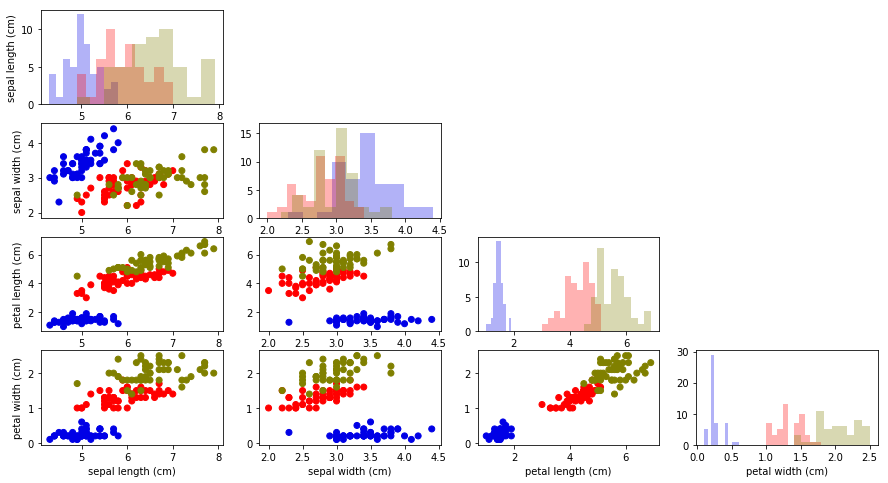

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,8)
from sklearn.datasets import load_iris
import matplotlib.pylab as plt

iris = load_iris()

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.5, .5, 0)}
colors = [color_map[y] for y in iris.target]

plt.figure(1)
for i, name_i in enumerate(iris['feature_names']):
    for j, name_j in enumerate(iris['feature_names']):
        
        if i>j:
            plt.subplot(4,4,i*4+j+1) # i numeruje wiersze, j kolumny
            plt.scatter(iris.data[:,j],iris.data[:,i],c = colors)
            
        elif i==j:
            plt.subplot(4,4,i*4+j+1) # i numeruje wiersze, j kolumny
            for k in range(3):
                plt.hist(iris.data[iris.target==k,j],color=color_map[k],alpha=0.3)
        if j ==0:
            plt.ylabel(name_i)
        if i ==3:
            plt.xlabel(name_j)
plt.show()

Dzielimy dane na treningowe i testowe:

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( multi_class='multinomial', solver ='lbfgs', max_iter= 1e4)

from sklearn.model_selection import train_test_split

X = iris.data
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=1)
print(X.shape, Y.shape)
print('-----')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(150, 4) (150,)
-----
(90, 4) (90,)
(60, 4) (60,)


Importujemy narzędzie do walidacji krzyżowej z sklearn

In [5]:
from sklearn.model_selection import cross_val_score

Wybieramy różne podzbiory cech i wykonujemy na nich trening z walidacją krzyżową:

In [8]:
sel_1 = [0,1]
X_train_sel =  X_train[:,sel_1]
scores = cross_val_score(clf, X_train_sel, y_train, cv=5, scoring= 'accuracy') # other scoring metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
print(scores)
print('---')
print("dokładność %0.2f  +/- %0.2f " % (scores.mean(), scores.std()))

[0.78947368 0.88888889 0.83333333 0.77777778 0.76470588]
---
dokładność 0.81  +/- 0.05 


/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Ver

In [9]:
sel_2 = [0,2]
X_train_sel =  X_train[:,sel_2]
scores = cross_val_score(clf, X_train_sel, y_train, cv=5, scoring= 'accuracy') # other scoring metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
print(scores)
print('---')
print("dokładność %0.2f  +/- %0.2f" % (scores.mean(), scores.std()))

[1.         0.94444444 0.94444444 0.94444444 0.94117647]
---
dokładność 0.95  +/- 0.02


/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Ver

In [ ]:
sel_3 = [2,3]
X_train_sel =  X_train[:,sel_3]
scores = cross_val_score(clf, X_train_sel, y_train, cv=5, scoring= 'accuracy') # other scoring metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
print(scores)
print('---')
print("dokładność %0.2f  +/- %0.2f" % (scores.mean(), scores.std()))

[1.         0.94444444 0.88888889 0.94444444 0.94444444]
---
dokładność 0.94  +/- 0.04


In [ ]:
sel_4 = [0,3]
X_train_sel =  X_train[:,sel_4]
scores = cross_val_score(clf, X_train_sel, y_train, cv=5, scoring= 'accuracy') # other scoring metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
print(scores)
print('---')
print("dokładność %0.2f  +/- %0.2f" % (scores.mean(), scores.std()))

[0.94444444 1.         0.94444444 0.83333333 0.83333333]
---
dokładność 0.91  +/- 0.07


W tym przykładzie najwyższą dokładnosć dostaliśmy dla sel_2. Trenujemy zatem model na wszystkich danych treningowych z cechami wg. sel_2

In [ ]:
sel = sel_2
clf.fit(X_train[:,sel], y_train)

LogisticRegression(max_iter=10000.0, multi_class='multinomial')

Dokładność na zbiorze testowym:  0.9666666666666667
Macierz pomyłek dla zbioru testowego:
[[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]


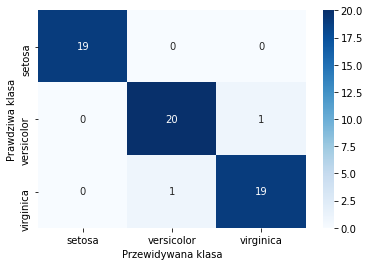

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #, ConfusionMatrixDisplay

sel = sel_2
y_pred = clf.predict(X_test[:, sel_2])

acc = accuracy_score(y_test, y_pred)
print('Dokładność na zbiorze testowym: ', acc)
print("Macierz pomyłek dla zbioru testowego:")

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True,  cmap='Blues',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidywana klasa' )
plt.show()

# Problem niezbalansowanych klas:
## Źródła:
- złe próbkowanie: prawdziwy rozkład klas w całej populacji jest w przybliżeniu równomierny, ale w zbiorze uczącym mamy dysproporcje
- rozkład klas w populacji faktycznie jest nierównomierny. Ten problem jest zwykle bardziej interesujący, w szczególności zwykle interesujące jest wykrywanie zjawisk rzadkich, np. diagnoza rzadko występującej choroby.

## Możliwe strategie radzenia sobie z tym problemem
- zebrać więcej danych

- oceniać modele za pomocą miar odpornych na niezrównoważenie klas:
 - macierz pomyłek: bardzo 'naocznie' pokazuje jak klasyfikator radzi sobie z poszczególnymi klasami
 - MCC
 - krzywa ROC - umożliwia dopasowanie na czym nam bardziej zależy: na czułości czy specyficzności
 

- repróbkowanie zbioru danych:
 - oversampling: dodanie przykładów z klasy mniej licznej poprzez repróbkowanie z powtórzeniami 
 - undersamling: 
   - losowe pominięcie próbek z klasy bardziej licznej
   - one-sided selection: https://sci2s.ugr.es/keel/pdf/algorithm/congreso/kubat97addressing.pdf, (przykładowa implementacja http://glemaitre.github.io/imbalanced-learn/auto_examples/under-sampling/plot_one_sided_selection.html); Pomysł polega na:
     - usunięciu przypadków redundantnych z klasy liczniejszej
     - usunięciu tych przykładów z klasy liczniejszej, które są albo bardzo blisko granicy decyzyjnej (bo niewielki szum mógłby spowodoawć ich przesunięcie) 
     - usunięciu przypadków z klasy liczniejszej podejrzanych o to, że mają nieoprawidłowo przypisaną klasę
     - przypdki graniczne lub źle otagowane są wykrywane na podstawie tzw. połaczeń Tomka (ang. Tomek links)-> dla dwóch przykładów  $i$ i $j$ o przeciwnych etykietach obliczanmy odległość $\delta(i,j)$. Jeśli nie istnieje przykład $k$ położony bliżej $i$ lub $j$, tzn. $\delta(i,k) < \delta(i,j)$ lub $\delta(j,k) < \delta(i,j)$ to para przykładów $(i,j)$ stanowi połaczenie Tomka i jest podejrzana o zaszumienie lub bycie blisko granicy decyzyjnej.
     
   
   

- wygenerować syntetyczne dane, np. techniką SMOTE (Synthetic Minority Over-sampling Technique https://arxiv.org/pdf/1106.1813.pdf). Pewną zletą algorytmu SMOTE jest to, że działa on w przestrzeni cech, nie wymagając wiedzy dziedzinowej do generacji nowych próbek. Idea atworzenia nowych próbek, cytując za autorami "Take the difference between the feature vector (sample) under consideration and its nearest neighbor. Multiply this difference by a random number between 0 and 1, and add it to the feature vector under consideration. This causes the selection of a random point along the line segment between two specific features." Jedna z implementacji: “UnbalancedDataset” module: https://github.com/scikit-learn-contrib/imbalanced-learn

- zmodyfikować funkcję kosztu, aby większa kara była przynawana za blędną klasyfikację mniej licznej klasy (algorytmy typu penalized-SVM https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html )

- wejść głębiej w problem i np.:
 - spróbować opisywać jedną kalsę, tą liczniejszą, a mało liczną traktować jako outliery
 - podzielić problem na klasyfikacje hierarchiczne (np. BCI - aktywny/nieaktywny, jeśli aktywny, to która klasa)
 
----
Dodatkowa lektura:

A Gentle Introduction to Imbalanced Classification:

https://machinelearningmastery.com/what-is-imbalanced-classification/

8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

Krawczyk, B. Learning from imbalanced data: open challenges and future directions. Prog Artif Intell 5, 221–232 (2016). https://doi.org/10.1007/s13748-016-0094-0:

https://link.springer.com/article/10.1007/s13748-016-0094-0